In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plankton_data = pd.read_excel("Data/ZooPlanktonPerryData.xlsx")
# Excel file with annual anomalies of the 20 zooplankton groups 
#         and the 16 physical variables initially considered in this study,
#            and the salmon marine survival rates (year is ocean entry year). 

In [3]:
# Print the sheet names
file_path = "Data/ZooPlanktonPerryData.xlsx"

print("Available sheets in the Excel file:")
for sheet_name in pd.ExcelFile(file_path).sheet_names:
    print("- " + sheet_name)

Available sheets in the Excel file:
- S2_Table caption
- 1. Zooplankton Biomass data
- 2. Biomass data definitions
- 3. Zooplankton anomalies
- 4. Physical anomalies
- 5. Salmon marine survivals


In [4]:
#Read sheets 
selected_sheet = "1. Zooplankton Biomass data"  
plankBiomass_data = pd.read_excel(file_path, sheet_name=selected_sheet)

selected_sheet = "2. Biomass data definitions"  
BiomassDefs = pd.read_excel(file_path, sheet_name=selected_sheet)

selected_sheet = "5. Salmon marine survivals"  
SalmonSurvivals_data = pd.read_excel(file_path, sheet_name=selected_sheet)

In [5]:
##
#
SalmonSurvivals_data.columns

Index(['Ocean Entry Year', 'Cowichan Chinook', 'Harrison Chinook',
       'Puntledge Chinook', 'Big Qualicum Coho'],
      dtype='object')

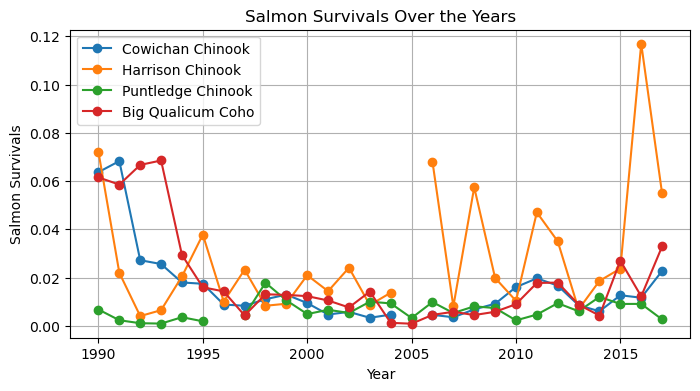

In [6]:
# List of salmon types to plot
salmonTypes_List = ['Cowichan Chinook', 'Harrison Chinook', 'Puntledge Chinook', 'Big Qualicum Coho']

# Plot Salmon Survivals Over the Years
plt.figure(figsize=(8, 4))

for salmon_type in salmonTypes_List:
    plt.plot(SalmonSurvivals_data['Ocean Entry Year'], SalmonSurvivals_data[salmon_type], label=salmon_type, marker='o')

plt.title('Salmon Survivals Over the Years')
plt.xlabel('Year')
plt.ylabel('Salmon Survivals')
plt.legend()
plt.grid(True)
plt.show()

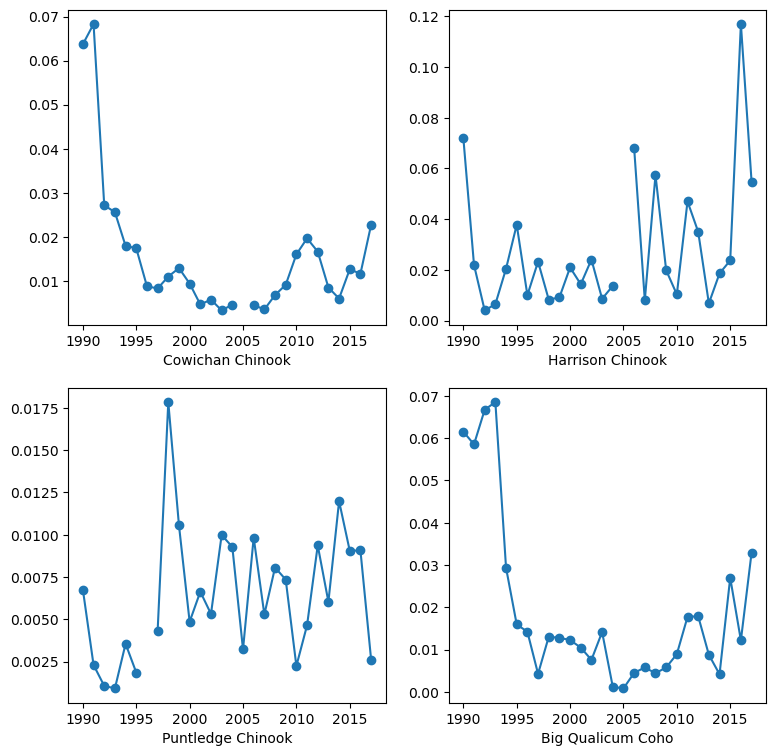

In [7]:
# Plot Salmon Survivals Over the Years for each type

## fill in plt.subplots
fig,axes = plt.subplots(2,2,figsize=(9,9))

## fill in the 0,0 plot here
salmon_type=salmonTypes_List[0]
axes[0,0].plot(SalmonSurvivals_data['Ocean Entry Year'], SalmonSurvivals_data[salmon_type], label=salmon_type, marker='o')
axes[0,0].set_xlabel(salmon_type, fontsize=10)

## fill in the 0,1 plot here
salmon_type=salmonTypes_List[1]
axes[0,1].plot(SalmonSurvivals_data['Ocean Entry Year'], SalmonSurvivals_data[salmon_type], label=salmon_type, marker='o')
axes[0,1].set_xlabel(salmon_type, fontsize=10)

## fill in the 1,0 plot here
salmon_type=salmonTypes_List[2]
axes[1,0].plot(SalmonSurvivals_data['Ocean Entry Year'], SalmonSurvivals_data[salmon_type], label=salmon_type, marker='o')
axes[1,0].set_xlabel(salmon_type, fontsize=10)

## fill in the 1,1 plot here
salmon_type=salmonTypes_List[3]
axes[1,1].plot(SalmonSurvivals_data['Ocean Entry Year'], SalmonSurvivals_data[salmon_type], label=salmon_type, marker='o')
axes[1,1].set_xlabel(salmon_type, fontsize=10)

plt.show()

In [8]:
#Common year range for plankBiomass_data and SalmonSurvivals_data
start_year=max(plankBiomass_data['yr'].min(),SalmonSurvivals_data['Ocean Entry Year'].min())
end_year=min(plankBiomass_data['yr'].max(),SalmonSurvivals_data['Ocean Entry Year'].max())
common_range = range(start_year, end_year)

#Calculate average Total Biomass for each year inside the common year range
avg_total_biomass_by_year = plankBiomass_data[plankBiomass_data['yr'].isin(common_range)].groupby('yr')['Total.Biomass'].mean().reset_index()

# Merge the average Total Biomass with SalmonSurvivals_data on the year column 
merged_data = pd.merge(avg_total_biomass_by_year, SalmonSurvivals_data, left_on='yr', right_on='Ocean Entry Year')


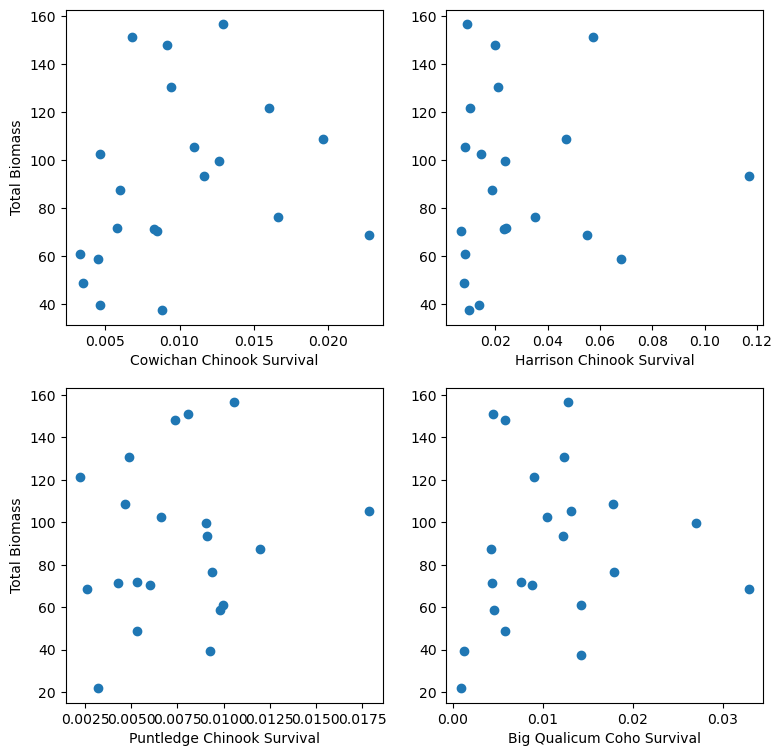

In [9]:
#Scatter plot

## fill in plt.subplots
fig,axes = plt.subplots(2,2,figsize=(9,9))

## fill in the 0,0 plot here
salmon_type=salmonTypes_List[0]
axes[0,0].scatter(merged_data[salmon_type], merged_data['Total.Biomass'], label=salmon_type, marker='o')
axes[0,0].set_xlabel(salmon_type+ ' Survival', fontsize=10)
axes[0,0].set_ylabel('Total Biomass', fontsize=10)


## fill in the 0,1 plot here
salmon_type=salmonTypes_List[1]
axes[0,1].scatter(merged_data[salmon_type], merged_data['Total.Biomass'], label=salmon_type, marker='o')
axes[0,1].set_xlabel(salmon_type+ ' Survival', fontsize=10)

## fill in the 1,0 plot here
salmon_type=salmonTypes_List[2]
axes[1,0].scatter(merged_data[salmon_type], merged_data['Total.Biomass'], label=salmon_type, marker='o')
axes[1,0].set_xlabel(salmon_type+ ' Survival', fontsize=10)
axes[1,0].set_ylabel('Total Biomass', fontsize=10)

## fill in the 1,1 plot here
salmon_type=salmonTypes_List[3]
axes[1,1].scatter(merged_data[salmon_type], merged_data['Total.Biomass'], label=salmon_type, marker='o')
axes[1,1].set_xlabel(salmon_type+ ' Survival', fontsize=10)

# Display the plot
plt.show()

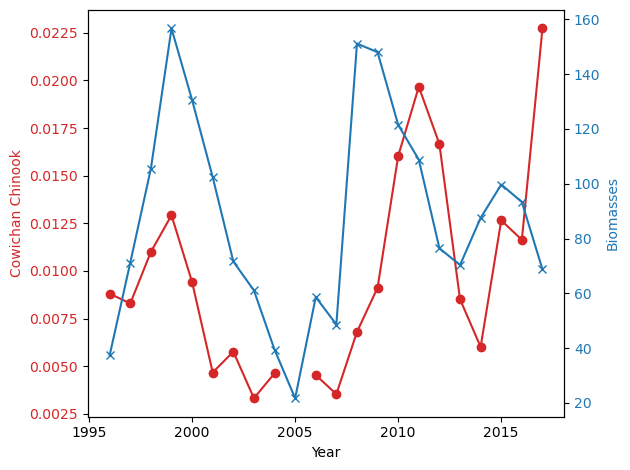

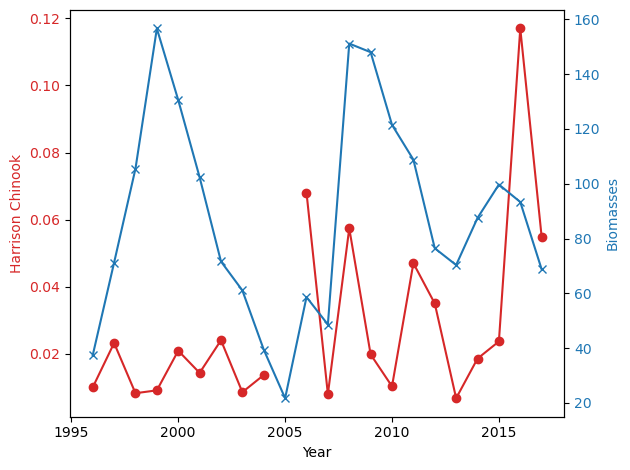

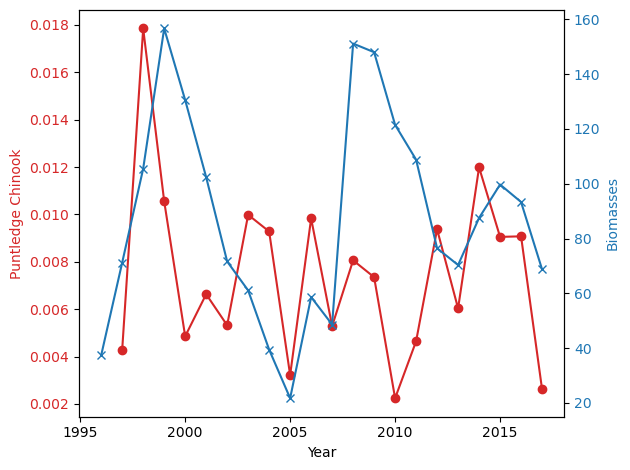

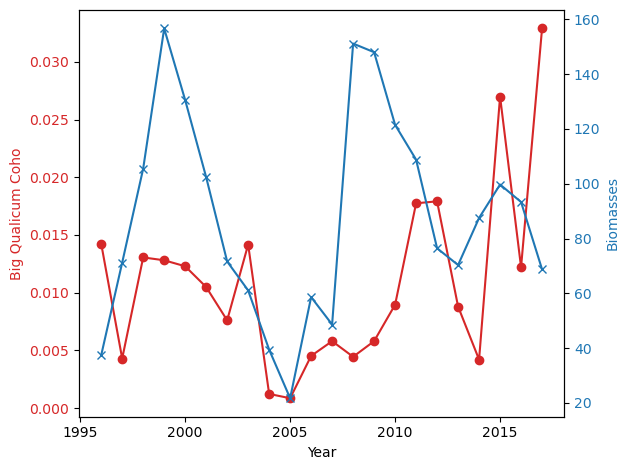

In [10]:
#Line Plot with different y-axis
#Salmon Types and Average Total Biomass over the years

#salmonTypes_List = ['Cowichan Chinook', 'Harrison Chinook', 'Puntledge Chinook', 'Big Qualicum Coho']
for salmon_type in salmonTypes_List:

    # Line plotting 
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(salmon_type, color=color)
    ax1.plot(merged_data['Ocean Entry Year'], merged_data[salmon_type], color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    #a second axes that shares the same x-axis
    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Biomasses', color=color)
    ax2.plot(merged_data['Ocean Entry Year'], merged_data['Total.Biomass'], color=color,marker='x')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()